In [ ]:
# Question 2
#A.
import pandas as pd
import numpy as np

df = pd.read_csv('parkinsons_updrs_data.csv')

df['first'] = 1

df.head()


In [7]:
#B.
#Age -36 הערך מצייג את גיל הנבדקים. ממוצע גלאי הנבדקים הינו 65 , הנבדק המבוגר ביותר בן 85, הנבדק הצעיר ביותר בן   
#sex-הערך מייצג את מין הנבדק. הערך הינו ערך בוליאני. 0 מייצג גבר ו-1 מייצג אישה. 32% מהנבדקים הינם גברים

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  # This is added back by InteractiveShellApp.init_path()


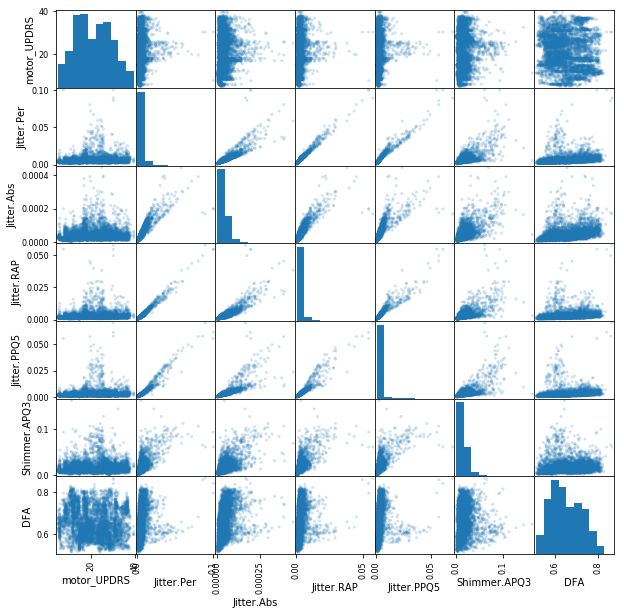

In [10]:
#C:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline


df1 = df[['motor_UPDRS', 'Jitter.Per', 'Jitter.Abs','Jitter.RAP','Jitter.PPQ5', 'Shimmer.APQ3', 'DFA']]
pd.scatter_matrix(df1, alpha=0.2, figsize=(10, 10))
plt.show()

In [11]:
#D:
    
def answer_D(x,y):
    first_step = np.linalg.inv(np.dot(x.T,x))
    sec_step =  np.dot(first_step,x.T) 
    third_step = np.dot(sec_step,y)                           
    return third_step
    
  

 
 




In [12]:
#E:

x = np.array(df[['first','Jitter.Per', 'Jitter.Abs','Jitter.RAP','Jitter.PPQ5', 'Shimmer.APQ3', 'DFA']])
y = np.array(df[['motor_UPDRS']])
w = answer_D(x,y)
w

array([[ 3.01179617e+01],
       [ 1.35025189e+03],
       [-2.05976226e+04],
       [-1.19055662e+03],
       [-7.51684784e+02],
       [ 4.34744789e+01],
       [-1.67630228e+01]])

In [18]:
#F:
import os
import pandas as pd
from statsmodels.formula.api  import ols


df2 = df[['motor_UPDRS','first', 'Jitter.Per', 'Jitter.Abs','Jitter.RAP','Jitter.PPQ5', 'Shimmer.APQ3', 'DFA']]
df2['motor_UPDRS'].values.reshape(-1, 1)
df2 = df2.rename(index=str, columns={'Jitter.Per': 'Jitter_Per','Jitter.Abs': 'Jitter_Abs','Jitter.RAP': 'Jitter_RAP','Jitter.PPQ5':'Jitter_PPQ5',
                                    'Shimmer.APQ3':'Shimmer_APQ3'})
est = ols(formula = ' motor_UPDRS ~ first + Jitter_Per + Jitter_Abs + Jitter_RAP + Jitter_PPQ5 + Shimmer_APQ3 + Shimmer_APQ3 + DFA', data = df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_UPDRS   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     38.61
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.94e-46
Time:                        08:47:22   Log-Likelihood:                -20533.
No. Observations:                5875   AIC:                         4.108e+04
Df Residuals:                    5868   BIC:                         4.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.0590      0.509     29.600      0.000      14.062      16.056
first           15.0590      0.509     29.600      0.000      14.062      16.056
Jitter_Per    1350.2519    158.081      8.542      0.000    1040.355    1660.148
Jitter_Abs    -2.06e+04   6726.924     -3.062      0.002   -3.38e+04   -7410.373
Jitter_RAP   -1190.5566    191.788     -6.208      0.000   -1566.532    -814.582
Jitter_PPQ5   -751.6848    126.651     -5.935      0.000    -999.967    -503.403
Shimmer_APQ3    43.4745     10.981      3.959      0.000      21.947      65.002
DFA            -16.7630      1.598    -10.489      0.000     -19.896     -13.630
==============================================================================
Omnibus:                      476.923   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.811
Skew:                           0.150   Prob(JB):                     4.92e-38
Kurtosis:                       2.218   Cond. No.                     2.36e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#f: בשני המקרים קיבלנו את אותם הערכים לאמד

![image.png](attachment:image.png)

In [1]:
# Question 4


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np


In [2]:
# (a)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# (b)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [4]:
# (c+d)
y_one_vs_all_train = {}
y_one_vs_all_test = {}
lrs = {}
print(y_test)
for i in range(3):
    y_one_vs_all_train[i] = np.ones(y_train.shape)*-1
    y_one_vs_all_train[i][y_train==i] = 1
    
    y_one_vs_all_test[i] = np.ones(y_test.shape)*-1
    y_one_vs_all_test[i][y_test==i] = 1
#     print(y_one_vs_all_test[i])
    
    lrs[i] = LogisticRegression()
    lrs[i].fit(X_train,y_one_vs_all_train[i])
#     print(lrs[i].predict_proba(X_test))
    
    print(f'{i} score: {lrs[i].score(X_test, y_one_vs_all_test[i])}')
# y

[1 0 2 2 0 0 1 1 0 2 2 1 0 0 2 1 2 1 0 0 1 1 2 2 1 0 1 1 1 2 0 1 2 1 0 2 2
 1]
0 score: 1.0
1 score: 0.6842105263157895
2 score: 0.9473684210526315


In [5]:
# (e)

def get_one_vs_all(lrs, test):
    predictions = [max(lrs.keys(), key=lambda i: lrs[i].predict_proba([x])[0, 1]) for x in test]
#     for sample_idx, sample in enumerate(test):
#         print([lrs[i].predict_proba([sample]) for i in lrs])
#         max_lr = max(lrs.keys(), key=lambda i: lrs[i].predict_proba([sample])[0, 1])
#         print(max_lr)
    return predictions



y = get_one_vs_all(lrs, X_test)

y == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

[(1, 1), (0, 0), (2, 2), (2, 2), (0, 0), (0, 0), (1, 2), (1, 1), (0, 0), (2, 2), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (1, 1), (2, 2), (1, 1), (0, 0), (0, 0), (1, 1), (1, 2), (2, 2), (2, 2), (1, 1), (0, 0), (1, 2), (1, 1), (1, 1), (2, 2), (0, 0), (1, 1), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (1, 2)]


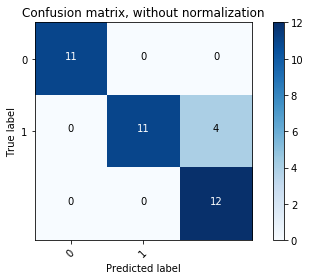

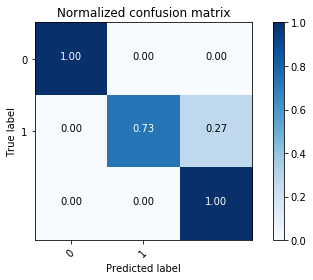

In [7]:
# (f)

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
y_pred = get_one_vs_all(lrs, X_test)
# print(y_test)
# print(y_pred)
print(list(zip(y_test, y_pred)))
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



In [8]:
# (g)
# print(list(zip(X_train, y_train)))
for i, sample in enumerate(X_test):
    print(f'X: {sample}, true label: {y_test[i]}, classifier 1: {lrs[1].predict_proba([sample])[0, 1]}, '
          f'classifier 2: {lrs[2].predict_proba([sample])[0, 1]}')
print()
for i in range(3):
    print(f'classifier {i}:')
    print(lrs[i].coef_)
print()
print(f'average train sample for classifier 1: {np.average(X_train[y_train==1], axis=0)}')
print(f'average train sample or classifier 2: {np.average(X_train[y_train==2], axis=0)}')
print()
print(f'average test for classifier 1: {np.average(X_test[y_test==1], axis=0)}')
print(f'average test for classifier 2: {np.average(X_test[y_test==2], axis=0)}')
print()
print("""The last test sample is labeled as 1, but tagged as 2 by the one-vs-all classifer.
We can tell by looking at the classifiers' weights that classifier 1 relies mostly on features 0,2, while 1,3 negate it,
and classifier 2 relies mostly on features 2,3, while 0,1 negate it.

We look at the data for the problematic sample: [ 5.6  3.   4.5  1.5].
Comparing to other samples of label 1, this has a relatively high value for feature 1 and 2.
This causes the score for classifier 1 be relatively low (0.27) and for classifier 2 be a little high (0.44),
which causes the sample to be labeled as 2.""")

X: [5.7 3.  4.2 1.2], true label: 1, classifier 1: 0.31842567548728873, classifier 2: 0.15081079174784176
X: [4.9 3.1 1.5 0.1], true label: 0, classifier 1: 0.2319246715255448, classifier 2: 0.00011700991022690174
X: [6.1 3.  4.9 1.8], true label: 2, classifier 1: 0.27960008167140504, classifier 2: 0.6287402302847546
X: [6.9 3.2 5.7 2.3], true label: 2, classifier 1: 0.2543561079263805, classifier 2: 0.8682121895240643
X: [4.8 3.4 1.9 0.2], true label: 0, classifier 1: 0.14859468004697626, classifier 2: 0.000309027953649461
X: [5.2 3.4 1.4 0.2], true label: 0, classifier 1: 0.1551910236649276, classifier 2: 5.076884717174594e-05
X: [5.4 3.  4.5 1.5], true label: 1, classifier 1: 0.23425219759154747, classifier 2: 0.5336967442627629
X: [6.2 2.2 4.5 1.5], true label: 1, classifier 1: 0.6714264817411383, classifier 2: 0.4127884418081678
X: [4.4 3.  1.3 0.2], true label: 0, classifier 1: 0.17788571221442065, classifier 2: 0.00024327253363154853
X: [6.3 2.7 4.9 1.8], true label: 2, classifi